---
# Übungszettel 5, Python Aufgabe
---

**ausgegeben am Mi 20.5.2020 12 Uhr, abzugeben bis Mi 27.5.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe

---

**Einführung**: In der Vorlesung wurden die Effekte gezeigt, die Dielektrika auf Plattenkondensatoren haben. Hier wollen wir uns einem speziellem Fall widmen, der analytisch nur mit großem Aufwand behandelt werden kann: einen Plattenkondensator, der schräg mit einem Dielektrikum (hier Glas) gefüllt ist.



Das Ziel der Aufgabe soll sein die Kenntnisse der letzten Aufgabe zu vertiefen und die Eigenschaften des elektrischen Feldes an der Grenzfläche zu diskutieren.

**Aufgabe**: Lösen Sie die Poisson-Gleichung eines Plattenkondesators mit inhomogenen Dielektrikum in 2D und diskutieren Sie die Auswirkungen. Speziell:

1. Stellen Sie ein Gitter für das elektrische Potential eines $10 \times 10$ cm großen, 2D Schnittes durch einen Plattenkondensators mit angelegter Spannung von 2 V auf.

2. Definieren Sie die relative Dielektrizitätskonstante ähnlich wie in der gezeigten Abbildung, das heißt z.B. $\epsilon_{r} = 4$ für $2x-y > 0$.

3. Lösen Sie die Poisson Gleichung ähnlich wie auf dem letzten Übungszettel mit Hilfe der Gauß-Seidel Methode iterativ. Es gilt dabei:
$$\varepsilon_{0}\vec{\nabla}\cdot\left(\varepsilon_{r}\vec{\nabla}\phi\right)=0$$
oder für ein Gitter mit finiten Differenzen:
$$\frac{\varepsilon_{r,i+1,j}-\varepsilon_{r,i-1,j}}{2\Delta x}\cdot\frac{\phi_{i+1,j}-\phi_{i-1,j}}{2\Delta x}+\frac{\varepsilon_{r,i,j+1}-\varepsilon_{r,i,j-1}}{2\Delta y}\cdot\frac{\phi_{i,j+1}-\phi_{i,j-1}}{2\Delta y}+\varepsilon_{r,i,j}\left(\frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{\Delta x^{2}}+\frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{\Delta y^{2}}\right)=0$$
oder nach Umformung und für $\Delta x = \Delta y$:
$$\phi_{i,j}=\frac{\varepsilon_{r,i+1,j}-\varepsilon_{r,i-1,j}}{16\varepsilon_{r,i,j}}\cdot\left(\phi_{i+1,j}-\phi_{i-1,j}\right)+\frac{\varepsilon_{r,i,j+1}-\varepsilon_{r,i,j-1}}{16\varepsilon_{r,i,j}}\cdot\left(\phi_{i,j+1}-\phi_{i,j-1}\right)+\frac{1}{4}\left(\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}\right)$$


4. Plotten Sie das Potential $\phi$ sowie $\vec{E}$- und das $\vec{D}$-Feld im Dielektrikum. Diskutieren Sie was an der Grenzfläche zwischen den Dielektrika mit den Feldern passiert.

**Vorgehensweise**: Die Vorgehensweise ist sehr ähnlich zur letzten Python Aufgabe. Wir empfehlen folgende Schritte, denen Sie jedoch nicht zwangweise auch folgen müssen:

1. Erzeugen Sie ein `numpy.meshgrid` aus zwei `numpy.linspace`, welches den Innenraum des Kondensators ($10\times10$ cm) abdeckt. Achten Sie dabei darauf, dass $\Delta x = \Delta y$, da sich die Aufgabe dadurch vereinfacht.

2. Erzeugen Sie einen `numpy.array` für das elektrostatische Potential `phi` mit Hilfe von `numpy.linspace` und `numpy.tile`, welches am oberen Rand 1 V besitzt und unten -1 V.

3. Erzeugen Sie ein `numpy.array` für $\epsilon_r$ mit Hilfe von `numpy.full`. `full` benötigt hier zwei Argumente, nämlich die Form des `array` (z.B. `[n,n]`) und den Wert, mit dem es gefüllt werden soll. Benutzen Sie *fancy indexing* um die Dielektrizitätskonstante im Bereich des anderen Dielektrikums anzupassen. Das heißt z.B. für alle Gitterpunkte für die $2x-y > 0$ gilt soll $\epsilon_r = 4$ sein.

4. Lösen Sie die Poisson Gleichung iterativ, mit Hilfe des Gauß-Seidel Verfahrens mit der oben angegebenen Gleichung. Typischerweise sollten etwa `n` bis `2*n` Iterationen nötig sein, wenn `n` die Anzahl der Gitterpunkte in $x$- oder $y$-Richtung ist.

5. Plotten Sie das resultierende Potential z.B. mit `contour` oder `contourf`, sowie das $\vec{E}$-Feld und $\vec{D}$-Feld mit `streamplot`. Nutzen Sie das optionale Argument `color` in `streamplot` und die Feldstärke, um die Pfeile einzufärben. Mit `colorbar` fügen Sie eine Farbskala hinzu. Das $\vec{E}$-Feld und $\vec{D}$-Feld können Sie mit Hilfe der `numpy.gradient` Funktion berechnen. Achten Sie darauf durch die Gitterkonstante zu teilen.

6. Betrachten Sie das Potential und die beiden anderen Felder in der Nähe der Grenzfläche und beschreiben Sie in wenigen Worten, was mit dem Potential und den Feldern hier passiert.

**Hilfestellung**: *fancy indexing* erlaubt auch Gleichungen als Argumente von `array`s. So können wir z.B. `A[x**2 > y**2] = 1` benutzen um alle Gitterzellen von einem `array` `A` = 1 zu setzen, für die gilt $x^2 > y^2$, so lange `x` und `y` die gleiche Form haben wie `A`.

Lange Ausdrücke in Python müssen nicht in eine Zeile geschrieben werden. Sie können den Ausdruck mit `\` unterbrechen und in der nächsten Zeile fortführen.

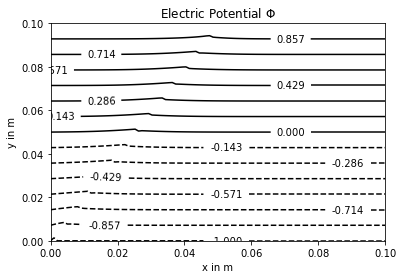

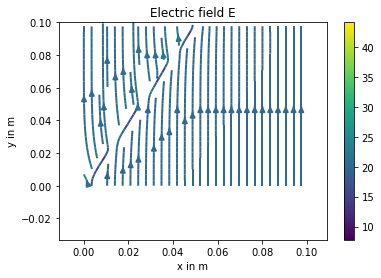

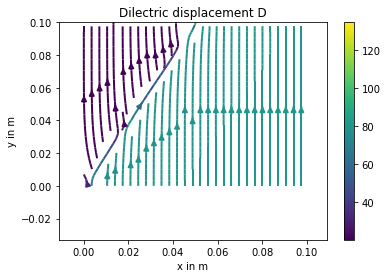

In [3]:
import numpy as np
import matplotlib.pyplot as plt

eps0 = 8.854e-12

##Kantenlänge
l = 0.1

##Koordinatengitter
rx = np.linspace(0,l,100)
ry = np.linspace(0,l,100)
x, y = np.meshgrid(rx, ry)

##Potentiale
top = 1
floor = -1
slope = (top - floor) / l

def phi(x,y):
    return floor + slope * y

pot = np.tile(phi(rx,ry), (100,1))
pot = np.transpose(pot)

##epsilonr
eps = np.full((100,100),1)
eps[(2*x - y) > 0] = 4

##Lösung der Possiongleichung

for i in range(200):
        pot[1:-2,1:-2] = (eps[2:-1,1:-2] - eps[0:-3,1:-2])/16*eps[1:-2,1:-2]*(pot[2:-1,1:-2]-pot[0:-3,1:-2])\
                        + (eps[1:-2,2:-1] - eps[1:-2,0:-3])/16*eps[1:-2,1:-2]*(pot[1:-2,2:-1]-pot[1:-2,0:-3])\
                        + 0.25*(pot[2:-1,1:-2] + pot[0:-3,1:-2] + pot[1:-2,2:-1] + pot[1:-2,0:-3])
        
        
##Berechnung des E-Feldes
Ey, Ex = np.gradient(pot)
Ex /= 0.001
Ey /= 0.001



CS = plt.contour(x,y,pot,colors = 'k', levels = np.linspace(-1,1,15))
plt.clabel(CS)
plt.title("Electric Potential $\Phi$")
plt.ylabel("y in m")
plt.xlabel("x in m")
plt.show()

feldx = np.sqrt(Ex**2+Ey**2)

plt.streamplot(rx,ry,Ex,Ey, color = feldx, linewidth=2)
plt.title("Electric field E")
plt.ylabel("y in m")
plt.xlabel("x in m")
plt.colorbar()
plt.show()


###### Wie D Feld berechnen ???##########
# so:
Dx = eps*Ex
Dy = eps*Ey

feldx = np.sqrt(Dx**2+Dy**2)

plt.streamplot(rx,ry,Dx,Dy, color = feldx, linewidth=2)
plt.title("Dilectric displacement D")
plt.ylabel("y in m")
plt.xlabel("x in m")
plt.colorbar()
plt.show()





In [22]:
print("Die Äquipotentiallinien werden an der Grenzfläche leicht angehoben. Das Feld wird im Dielektrikum geschwächt und nach dem Brechungsgesetz der Elektrostatik gebeugt, wobei die Komponente tangential zur Grenzfläche stetig ist.")

Die Äquipotentiallinien werden an der Grenzfläche leicht angehoben. Das Feld wird im Dielektrikum geschwächt und nach dem Brechungsgesetz der Elektrostatik gebeugt, wobei die Komponente tangential zur Grenzfläche stetig ist.


---
**Erste Hilfe Python:**
* Online-Sprechstunde jeden Montag und Freitag im Semester von 16-17 Uhr über BigBlueButton
* Studiengruppe im StudIP mit dem Titel “Erste Hilfe Python der SUB Göttingen”
* Übersichts-Pad ( https://pad.gwdg.de/ErsteHilfePython ) als alternative Anlaufstelle